# Time Series

A set of observations collected over time. Time series analysis can be used to do forecasting/prediction for next 1,2 or 3 time steps/periods.

You can do prediction if u understand underlying characteristics of this ts.By underlying characteristics we mean what is underlying mathematical model that this ts represents. If u know underlying mathematical model u can do predictions.

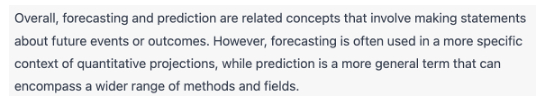

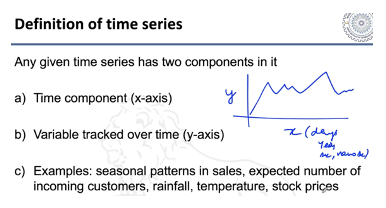

## Examples of Time Series

Trends and deviations/dips & peaks are seen in plot

**Single Time Series**

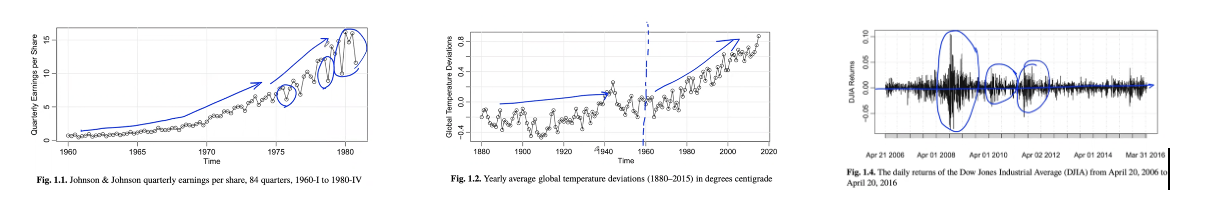

Trend is present in above 2 plots on LHS & also there are deviations present as sometimes temp is high & sometimes low. In RHS plot, more or less fluctuations about average however in a particlar period (2008) there were high deviations from the mean. Some of effects are also felt in next sets of deviation in 2010 and 2012.

**Two times Series (Correlation)**

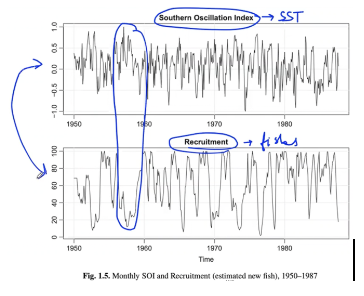

As marked in 1st TS, as sea surface temp goes high the fishes population goes down. Also when population is rising, sea surface temperatures are less. Hence we can relate one Time series with other Time series.

## Discrete Time Series

Even though we think of ts as continuous, time series is usually discrete in nature. We collect ts as a sequence of data points.

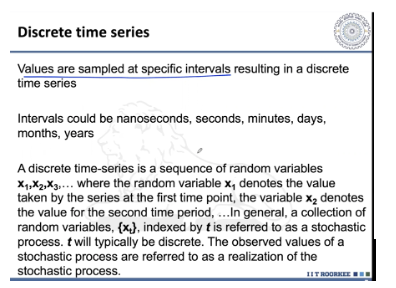

### If Understanding Time Series from Random Variable point of view-

### We say Time Series is a Stochastic Process-

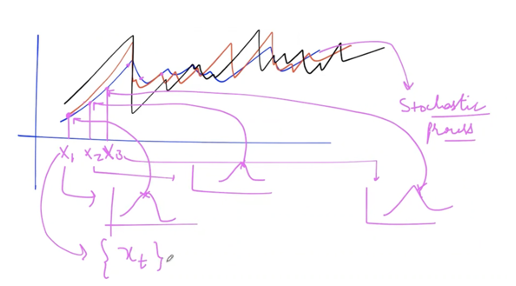

In Above figure-

- Blue is the observed time series. But if environmental conditions were bit different u could have obtained red ts or black ts or infinite similar other & u have no control on env. conditions but u only have the blue graph with u.
- So that's y it is described that values u obtained on blue graph (marked by pink dots) r random values because if env. conditions were different & u have no control over env. conditions, the  values of data points would be different each time.

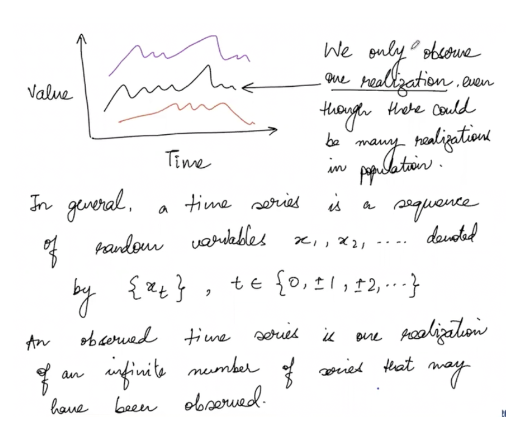

## Discrete and Continuous Time Series

- Whether a Time Series is continuous or discrete depends on your sampling. Both are used to identify trends, patterns, insights for decision making.
- Choice of analysis method will differ depending on whether discrete or continuous data.
- Choice of analysis method will differ based on specific properties of data like seasonality, autocorrelation and trend.

**Discrete**

- Data collected at fixed time interval.
- e.g. temp measured once per day, weekly sales data, monthly stock prices where prices recorded at end of each month.

**Continuous**

- Data collected continuously over time with no fixed intervals b/w observations. Sensor data, financial market data, Streaming video data.

## <font color=blue>Three Fundamental Time Series that we need to understand are-
    
<font color=blue>
    
## 1. White Noise
## 2. Moving Average 
## 3. Auto Regression.

With combination of all 3 or either of two u have time series which we usually observe in the real world. 

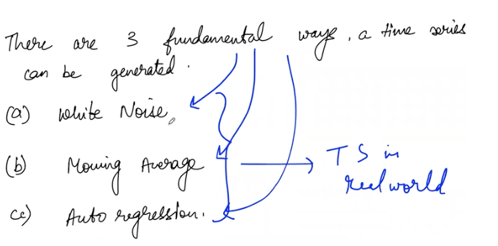

# ARMA

- It is a model used to study time series in real world.
- AR stands for Auto regression and MA stands for Moving Average. So ARMA is a combination of these 2 fundamental time series that is resulting in the real world time series that is there.

### <font color=blue>Given any time series (e.g. below) how can we represent it in form of WN, MA and AR i.e White Noise, Moving Average, Auto Regression which are 3 fundamental time series.
    
*Any time series can be decomposed into its consituent parts which could be either of or a combinations of 3 fundamental ts - WN, MA & AR.*

### e.g. is below time series a combination of **WN+MA or MA+AR or WN+MA+AR** ?

*If we can express any time series in these 3 fundamental ways we can understand the property of that time series cz we know the properties of these fundamental time series i.e, WN, MA and AR of which it is made of*

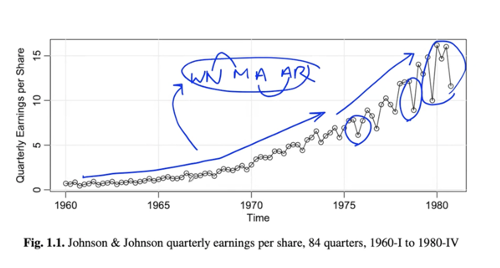

## <font color=blue>1. First Fundamental Time Series - White Noise

Its a noise and noise looks like something which u don't understand, looks disturbed. WN in general means some random fluctuations that cannot be explained. You can't say with certainty where next data point will go-up, down etc

If u can explain random fluctuations as well then u will have a perfect model but there r no perfect model cz there r always some random component that u r not able to explain.

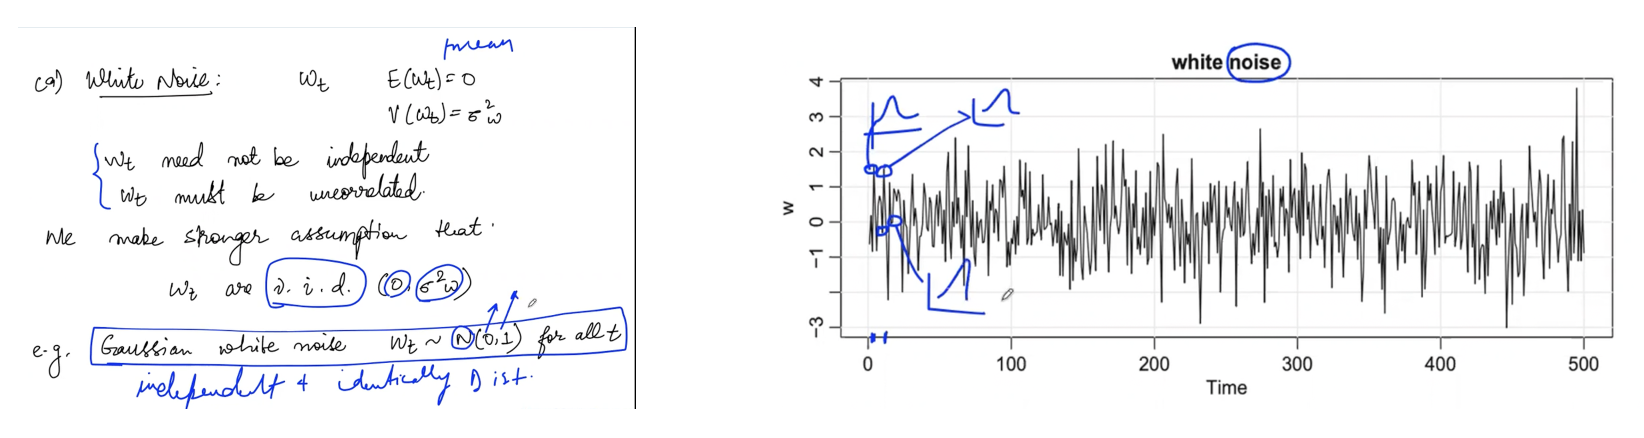

- The value at point is uncorrelated to value at another point as shown in fig. above but all points assume to come from same distribution.
- White Noise ts is an example of i.i.d independent & identically distributed variable.
- White Noise ts is i.i.d with mean=0 & variance of sigma^2
- If WN is present in time series that means there r some iid variables with mean=0 & variance of sigma^2. U can explain distribution of WN with this statistics of mu, sigma then.
- Usually model we use in ts, we use guassion WN where we say distribution is normal with mean=0 and s.d of 1.

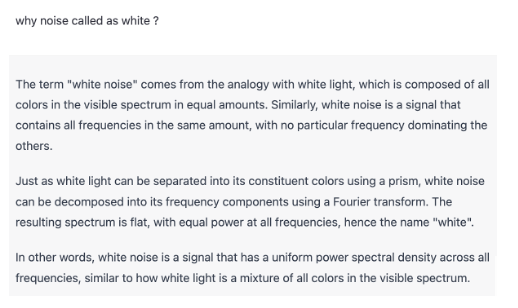

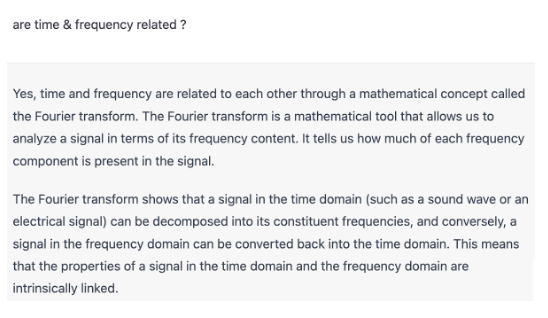

### I.I.D vs Non-I.I.D Algorithms in ML

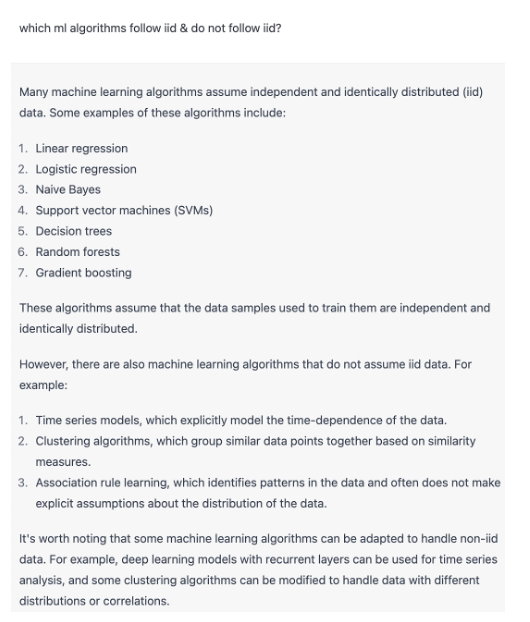

## <font color=blue>2. First Fundamental Time Series - Moving Averages

- Moving Average is a combination of your White Noises. When u combine these White noises they introduce correlation in the time series. The White noises as we study in fundamental WN ts that it was uncorrelated but a combination of different uncorrelated values can result in a correlated time series.
- By correlated ts it means that next value/data point will depend on earlier value/data point.
- So if some ts in increasing or decreasing then we can say that a value is dependent on previous value (values are correlated) so this correlation could have been introduced by a combuination of white noises.

**VT a linear combination of WT at different times** The MA model can be interpreted as a linear combination of the white noise terms. The MA model is used to capture short-term patterns or fluctuations in the time series that are not captured by the mean and other long-term trends.

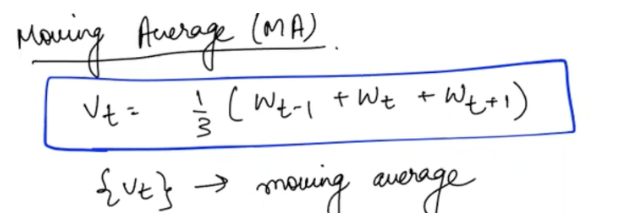

- For Moving Average since the data points are correlated so i.i.d does not hold true. They are definitely not independent but we cannot comment on the distribution (like from which distribution they have come) cz we do not know about that information.


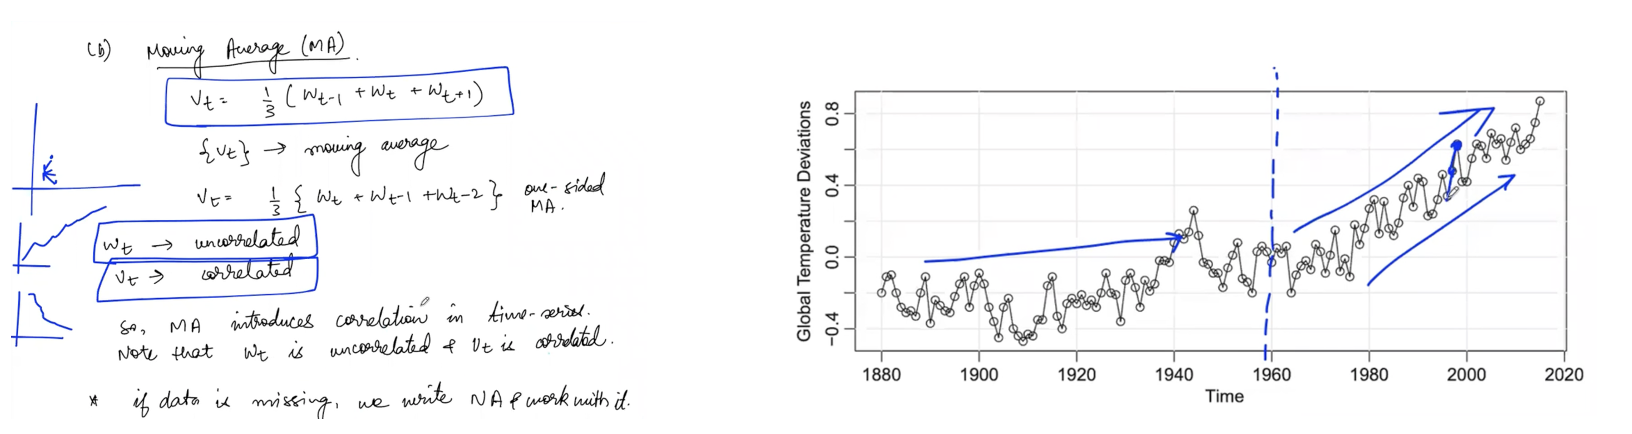

## Law of Large Numbers and CLT

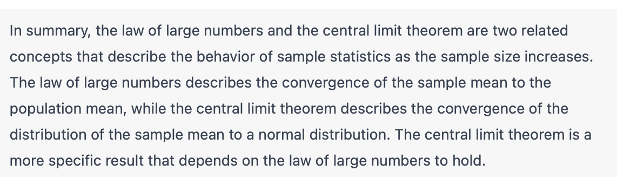

## <font color=blue>3. Third Fundamental Time Series - Auto Regression

AR depends on past values of the time series itself and some white noise is there.

**Difference b/w Auto Regression model and Moving Average model is that MA is usually built on White noise that is there while autoregresion is built on the previous values of your time series itself.** In AR, regression of current value with previous values. 

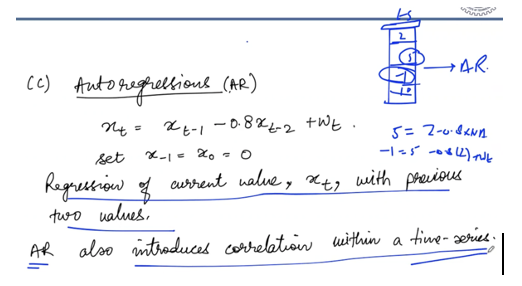

As per above equ. the amount of information that is included in xt-1 and xt-2 may not be enough to explain the values which is in xt. Maybe also dependent on xt-3 which was not included but cz of that there r some random fluctuations in current value that we can't explain that is y so to account for those random fluctuations, we have included wt(white noise) in equ above.

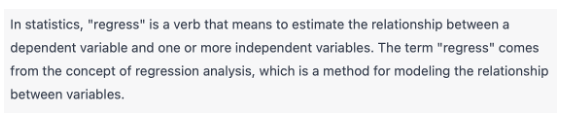

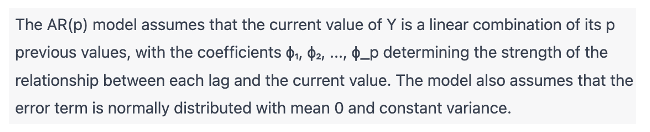

### Note on Random Walk with Drift

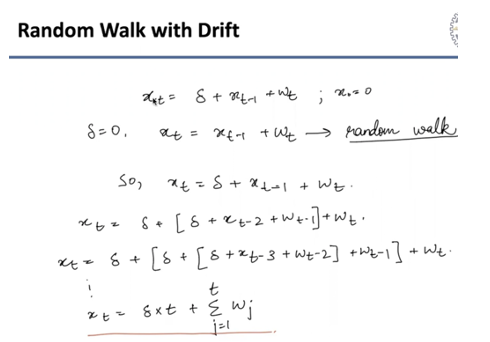

## White Noise - Practical

*The idea of this practical is to show that only deterministic signal can be modelled but not noise which are random fluctuations, data points not correlated with each other, anything which is not correlated u can't generate models for that & quantitative reason that noise cant be modelled is that if u do fft there r multiple freq components present, no dominating freq*

* What is deterministic signal
* What is white noise and understand it's characteristics
* Predictable and Unpredictable components of a time series

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, datetime
from statsmodels.tsa import stattools  # tsa for time series analysis
from scipy.fft import fft  
from scipy import fftpack
from sklearn.metrics import mean_squared_error

## Make different env for time series

In [2]:
data = pd.read_csv('datasets/temperature.csv')
data.head()

date  temp_sensor1  temp_sensor2
0  01-01-2019      0.000000      0.087449
1  02-01-2019      0.587785      0.520538
2  03-01-2019      0.951057      1.277838
3  04-01-2019      0.951057      1.254473
4  05-01-2019      0.587785      0.925179

*<b><font color=blue>In this experiment, temp_sensor1 readings to denote ideal situation perfect ts and temp_sensor2 to show real world ts.</b>*

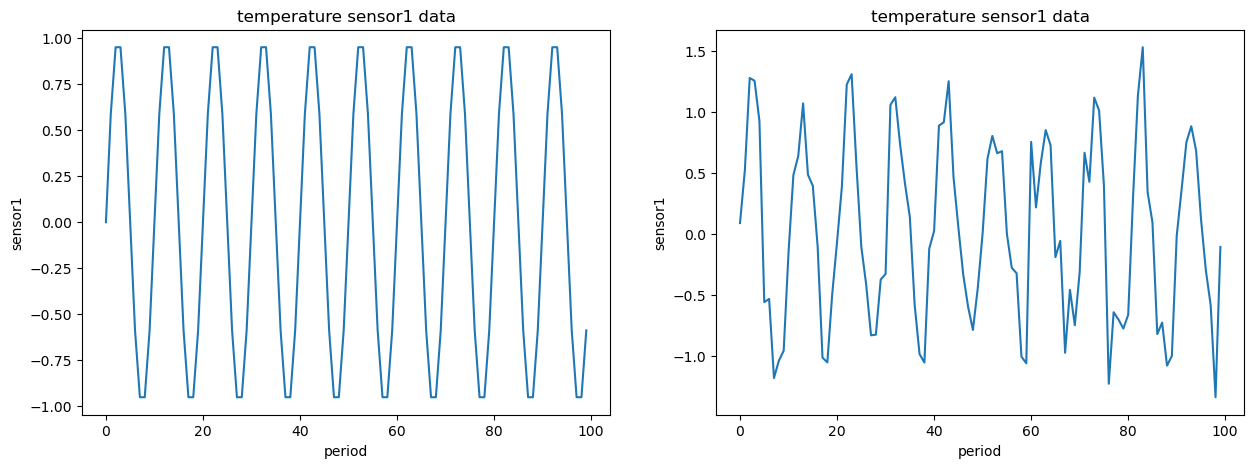

In [3]:
plt.figure(figsize=(15,5))
plt.subplot(121) # meaning 1*2 grid i.e 1 row & 2 col's, so 2 plots possible, this is 1st
plt.plot(data['temp_sensor1'])
plt.xlabel('period')
plt.ylabel('sensor1')
plt.title('temperature sensor1 data');

plt.subplot(122) # meaning 1*2 grid i.e 1 row & 2 col's, so 2 plots possible, this is 2nd
plt.plot(data['temp_sensor2'])
plt.xlabel('period')
plt.ylabel('sensor1')
plt.title('temperature sensor1 data');

In [4]:
data.shape    # 100 data points in a signal

(100, 3)

* We have observations from a particular equipment
* temp_sensor1 & temp_sensor2 are the two sensor readings

# Plot a line for 1st sensor only

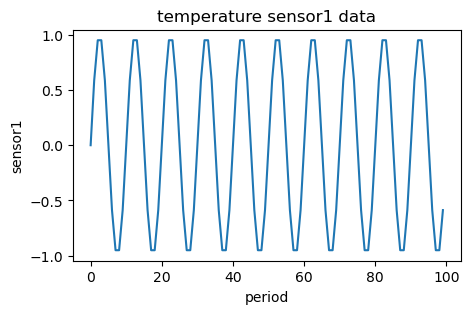

In [5]:
plt.figure(figsize=(5,3))
plt.plot(data['temp_sensor1'])
plt.xlabel('period')
plt.ylabel('sensor1')
plt.title('temperature sensor1 data');


* This data looks like a sine wave
* We want to capture the frequency of this sine wave to model this temp data to forecast the future values of this equipment
* To calc the frequencies we need to define one cycle which is value starting from zero then reaches 1 & then drops to -1 and reaches zero again and is taking 10 samples to complete one cycle in the above graph. 

In [6]:
period = 10               # Means after 10 samples data is repeated
frequency = 1/period
frequency

0.1

**Frequency plot** using **Fast Fourier transform (FFT)**
* <b>fft is a way to identify the various frequency components in the data</b>
* In general data is assumed to be a signal 
* signal is sent to fourier transform and then the transformed values tell the various frequencies available in the data or signal 

# Define a fn to transform the signal (Time domain to frequency domain) using FFT 

### FFT is an efficient algorithm to do Fourier Transform (which is converting signal from time domain to freq domain or find base frequencies) by reducing computational complexity.

There can be a combination of frequencies that is making up the ts, In `Fast Fourier Transform`, it tries to identify base frequency, the slowest freq that is there.

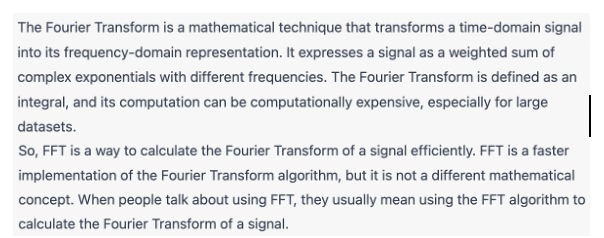

In [7]:
def plot_fft(sig):    # fast Fourier transform (FFT)
    sig_fft = fftpack.fft(sig)
    time_step = 1
    power = np.abs(sig_fft)**2 # power = Amplitude
    
# Generate frequency via fft
    sample_freq = fftpack.fftfreq(sig.size, d = time_step) 
                                # sig.size = data['temp_sensor1'].values.size -> 100

# Create a df with Frequency and Amplitude            
    df = pd.DataFrame({'sample_freq':sample_freq, 'power':power}) 
    df = df.sort_values('sample_freq')
    
# Plot the df with Frequency and Amplitude    
    plt.figure(figsize=(5,3))
    plt.plot(df['sample_freq'], df['power'])
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')

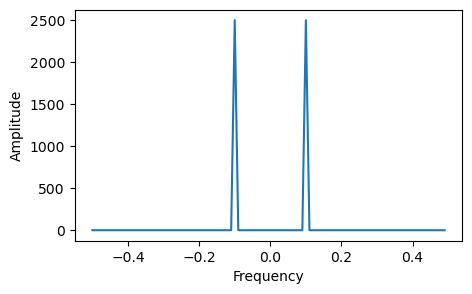

In [8]:

plot_fft(data['temp_sensor1'].values)


* In above graph we can see that Amplitude is zero for most of the values except for two frequencies(-0.1 to 0.1) which are very high
* Which indicates that we have one frequency component in our data and freq is 0.1

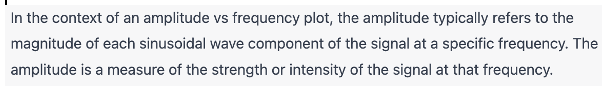

## Signal in Time-domain vs Freq domain for sensor1 data 

**From LHS we can see period is 10 (1 cycle time), so freq is 1/10= 0.1 and in freq domain using mathematical tool fft algorithm we can see base freq extracted is also 0.1. Hence proved.**

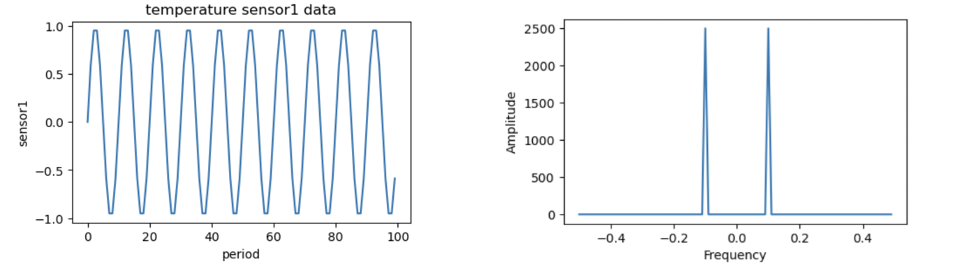

The underlying model is a sine wave with a frequency of 0.1.

In [9]:
np.array(range(len(data)))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

# Model the above data using sine wave equation & Predict values

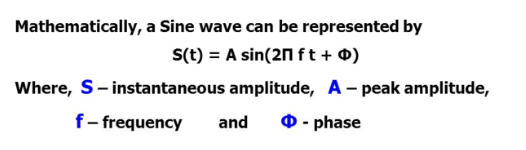

In [10]:
time_step = 1
period = 10
freq = 1/period
time_vec = np.array(range(len(data))) # Considering length of whole data in time as time vector
predicted = (np.sin(2*np.pi*freq*time_vec)) # sine wave equation to be made for whole data


# Plot the predicted data wrto dates

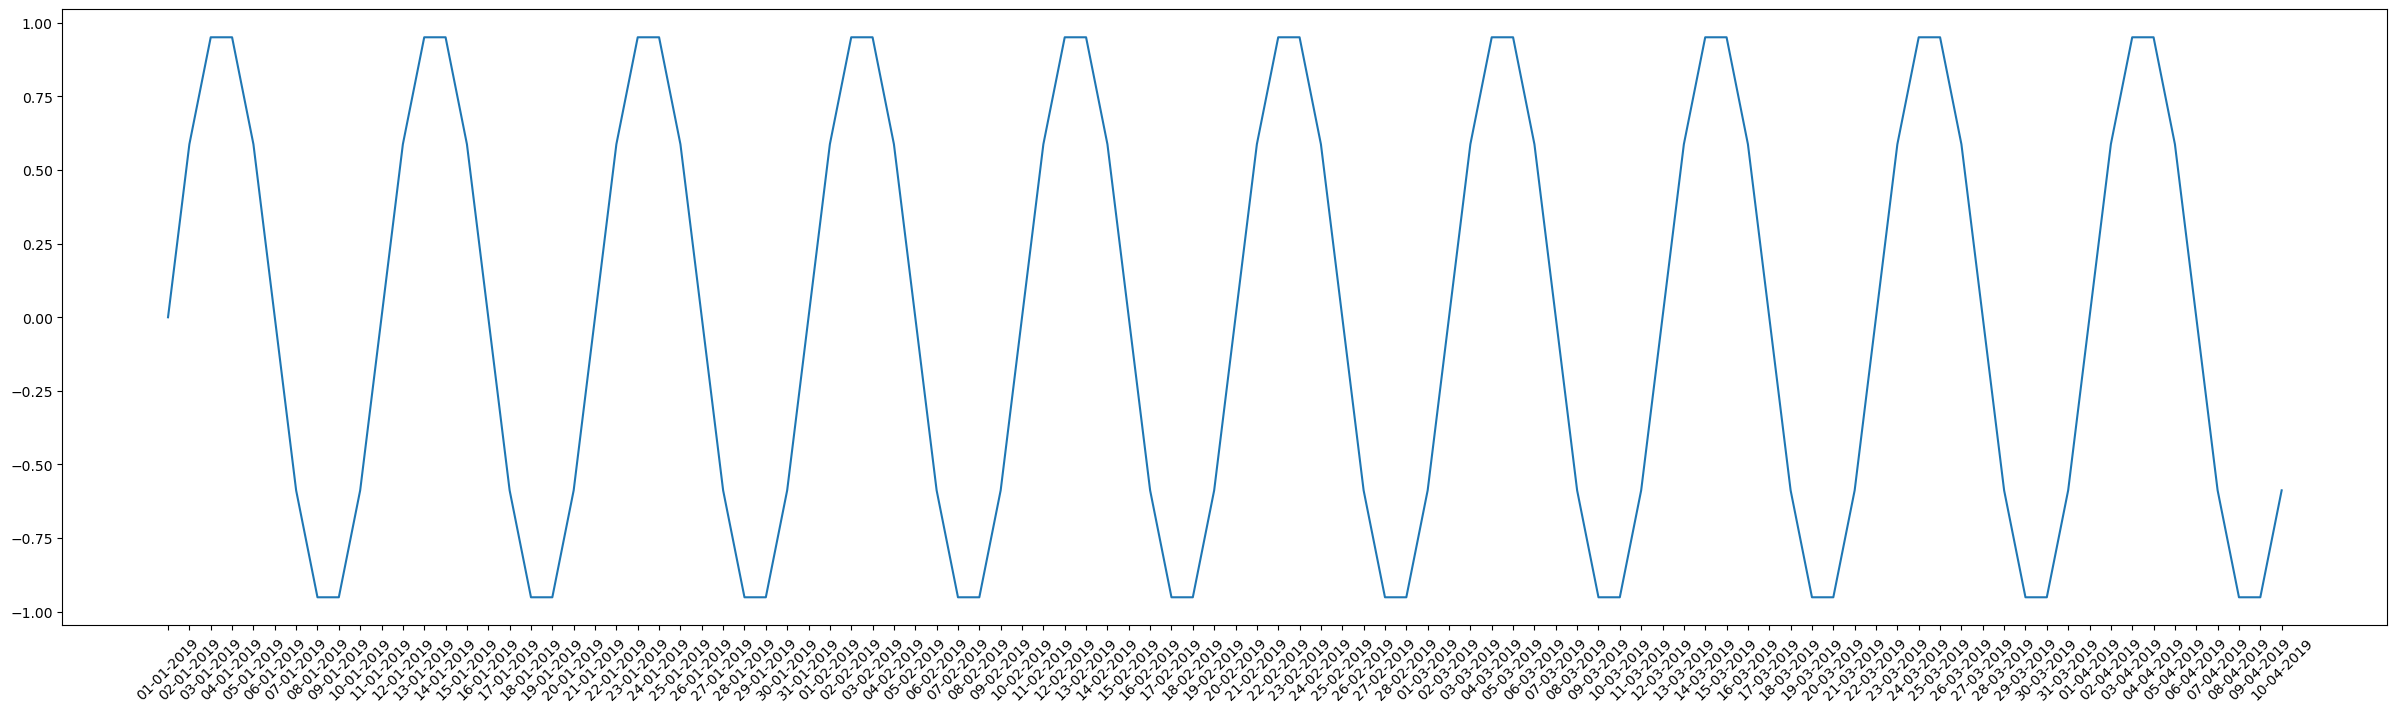

In [11]:
plt.figure(figsize=(30,8))
plt.plot(data['date'], predicted)
plt.xticks(rotation=45);

* We constructed a sine wave using the freq from the data itself
* We didn't use ML modelling technique but used a simple sine wave equation to predict the different values at different time instance and then compare it with actual values 
* In above graph, we have a predicted signal which is close to actual signal

# Calc MSE

In [12]:
mean_squared_error(data['temp_sensor1'], predicted)

6.906248686570994e-20

* The error is almost zero
* Meaning we are able to predict the values at every time instant using the sine equation we created  
* Data which can be exactly predicted at every time step is called **deterministic signal**

### *In reality we rarely have deterministic signal when we collect data i.e data will mostly have noise over deterministic signal* 


### Real Case Scenario

# Plot the second col from dataset with dates

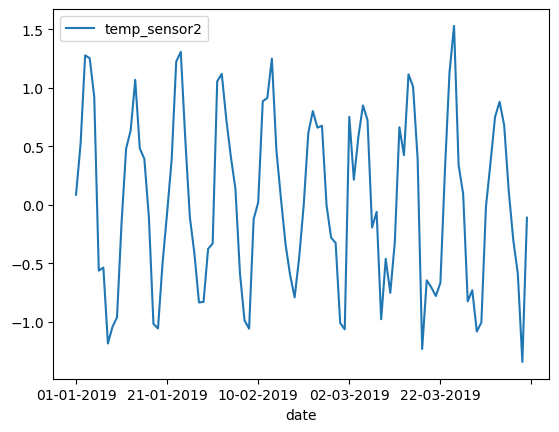

In [13]:
data.plot(x='date', y='temp_sensor2');

* Above graph displays that the sine wave doesn't look proper and carries some amount of noise at every data point

#### When we try to look for the frequency using the time plot, it is difficult to identify the period 
* Use fft helps to identify the freq

# Plot freq from 2nd col

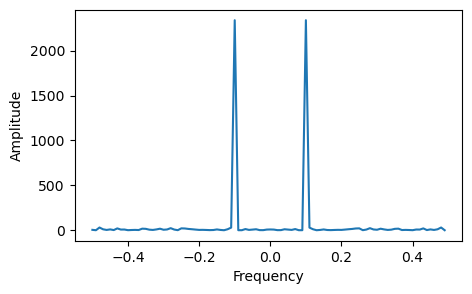

In [14]:
plot_fft(data['temp_sensor2'].values)

* In above graph we have higher amplitude at 0.1 and -0.1 
* And we have minor amplitudes at other freqs also due to noise in our data

**Note** - Data will always have deterministic part which can be expressed through a mathematical equation and will also have unpredictable part which can't be expressed through a mathematical equation

# Plot actual and predicted wrto dates

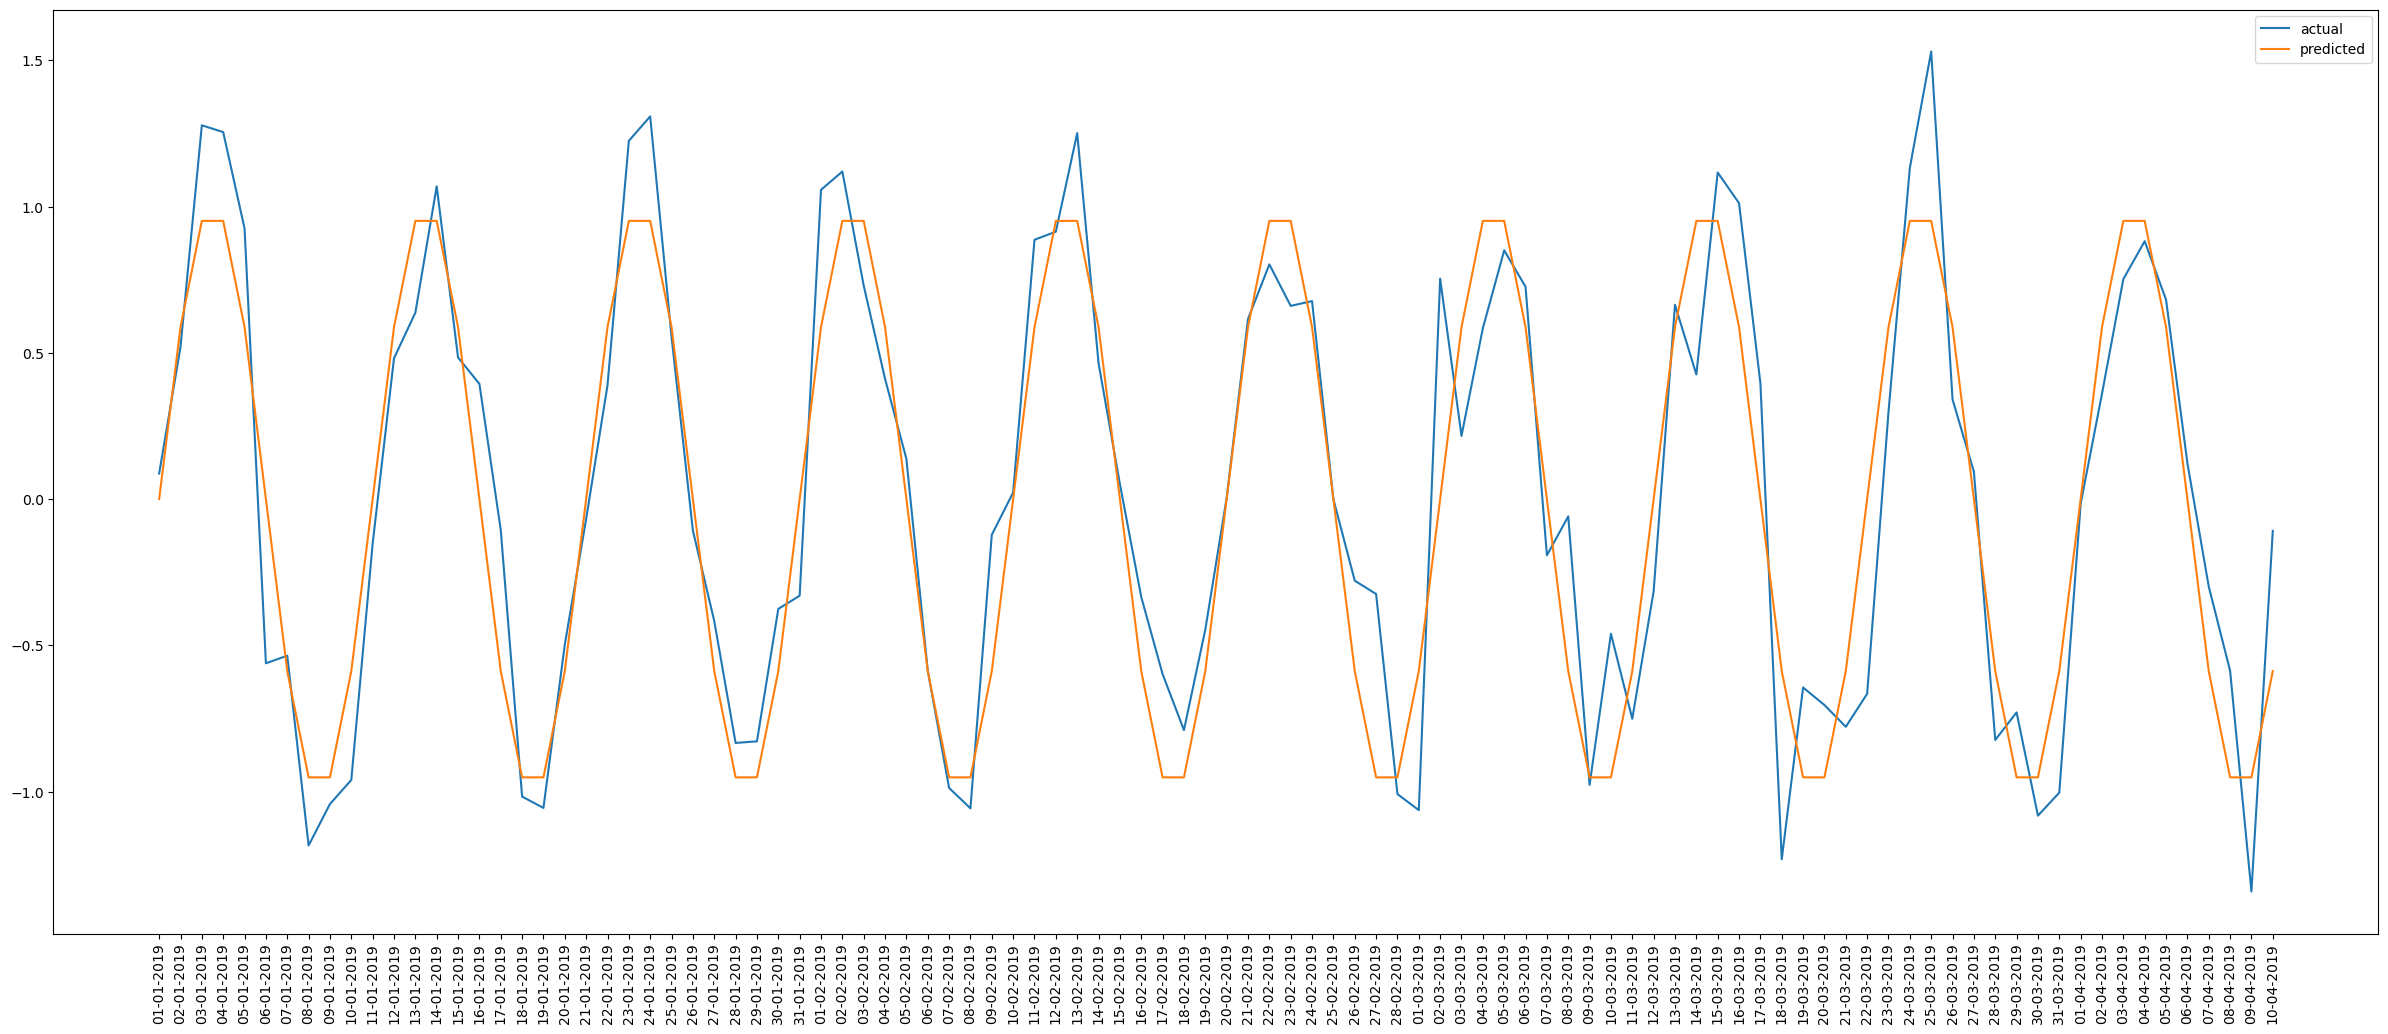

In [15]:
time_step = 1
period = 10
freq = 1/period
time_vec = np.array(range(len(data)))
predicted = (np.sin(2*np.pi*freq*time_vec)) # sine wave equation
plt.figure(figsize=(30,12))
plt.plot(data['date'], data['temp_sensor2'])
plt.plot(data['date'], predicted)
plt.legend(['actual','predicted'])
plt.xticks(rotation=90);

* In above graph we are comparing the predicted data (using the sin) wave with the original data. We won't exactly predict to it's original form due to errors at every timestamp.
* <font color=blue>Error will be coming becoz we are predicting the deterministic part and not the noise part

# Calc MSE for 2nd data col 

Our prediction is still same, sine equ. with freq=0.1 but since temp_sensor2 data is real world with noise hence error is more as compared to temp_sensor1

In [16]:
mean_squared_error(data['temp_sensor2'], predicted)

0.08511809623605698

### In above result we have error due to noise present in the signal

# Calculate residual and plot the signal wrto dates
* Residual - Difference b/w actual and predicted

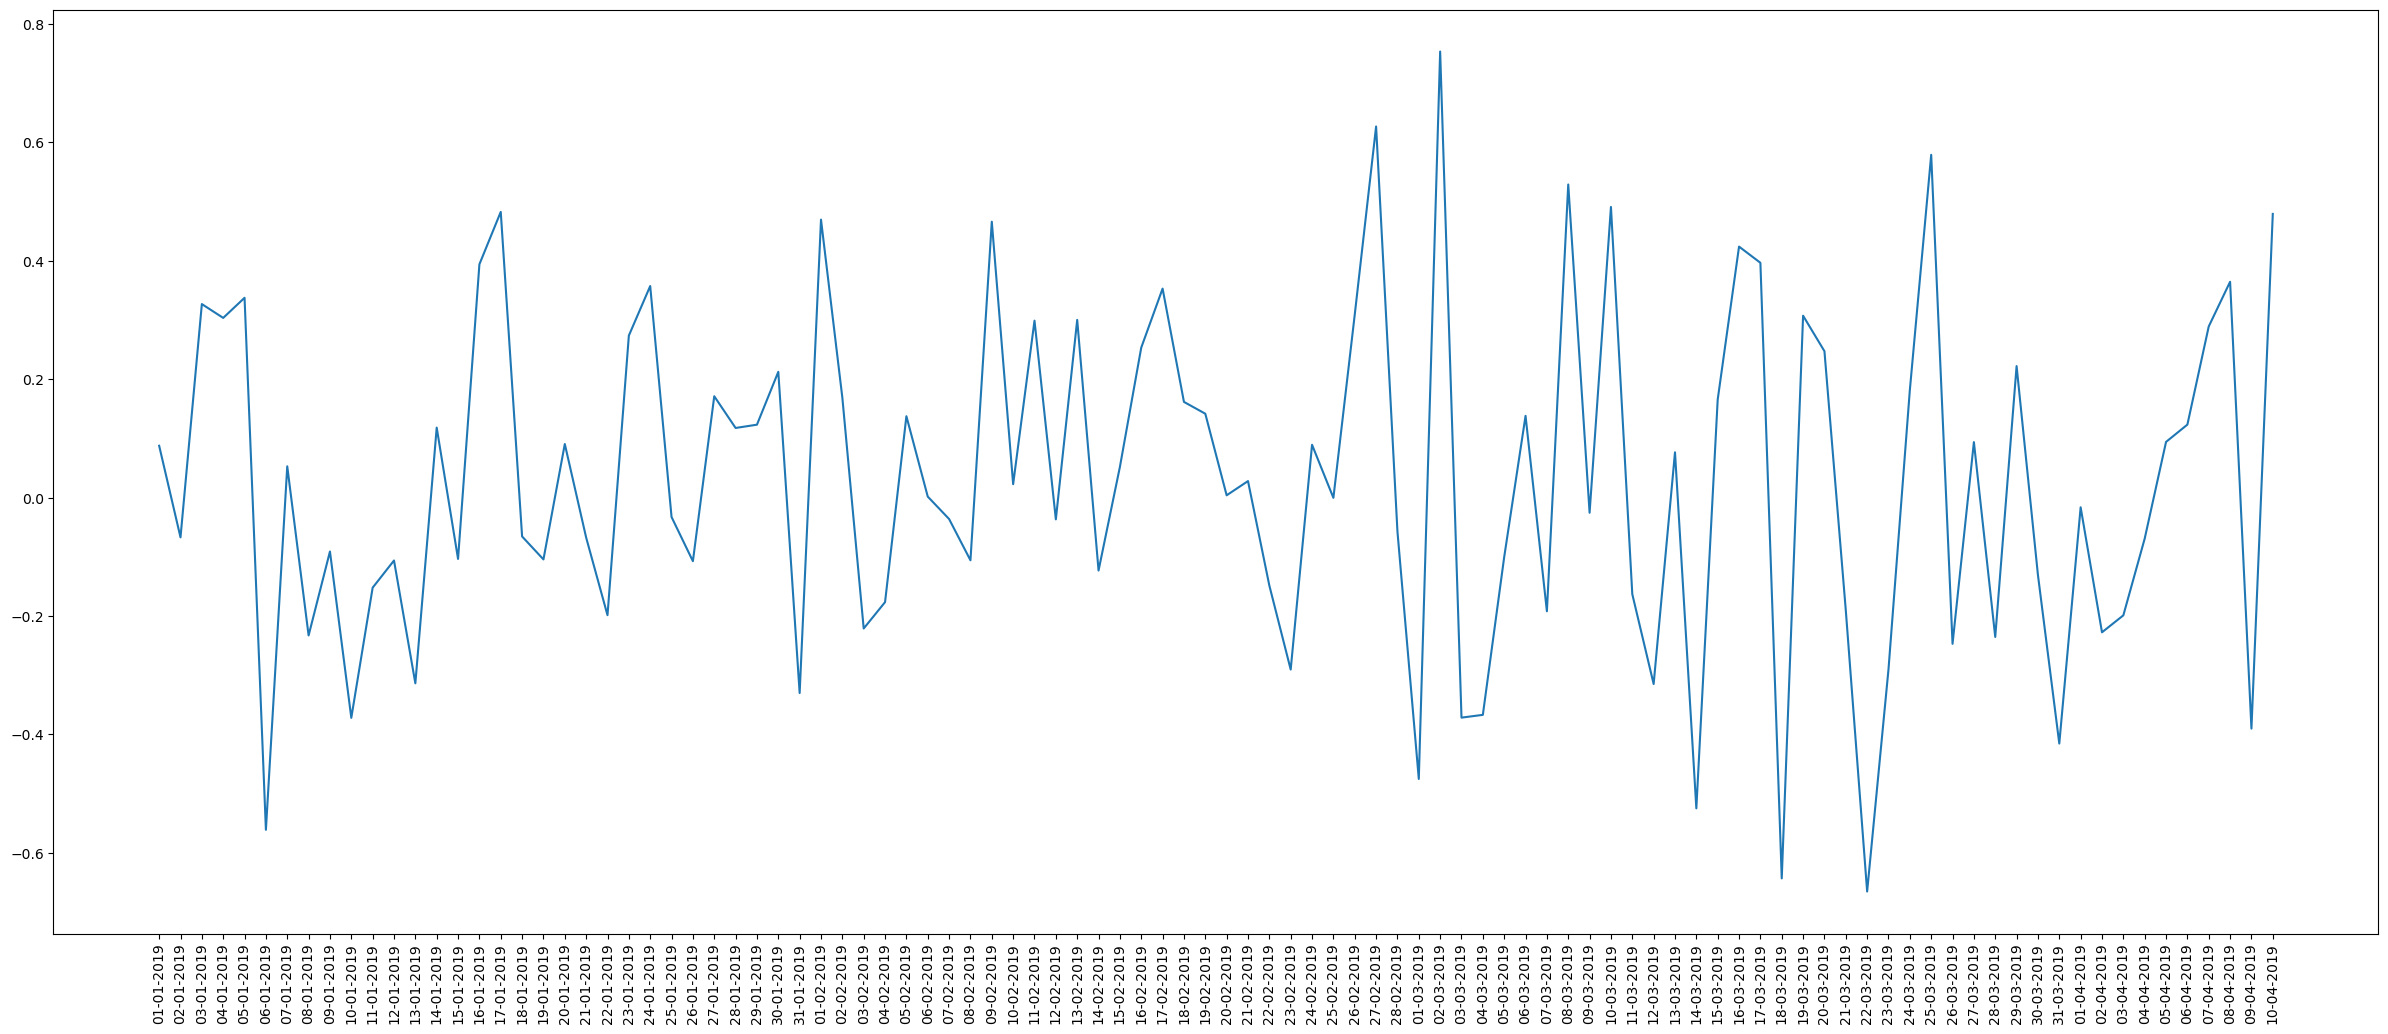

In [17]:
residual = data['temp_sensor2'] - predicted
plt.figure(figsize=(30,12))
plt.plot(data['date'], residual)
plt.xticks(rotation=90);

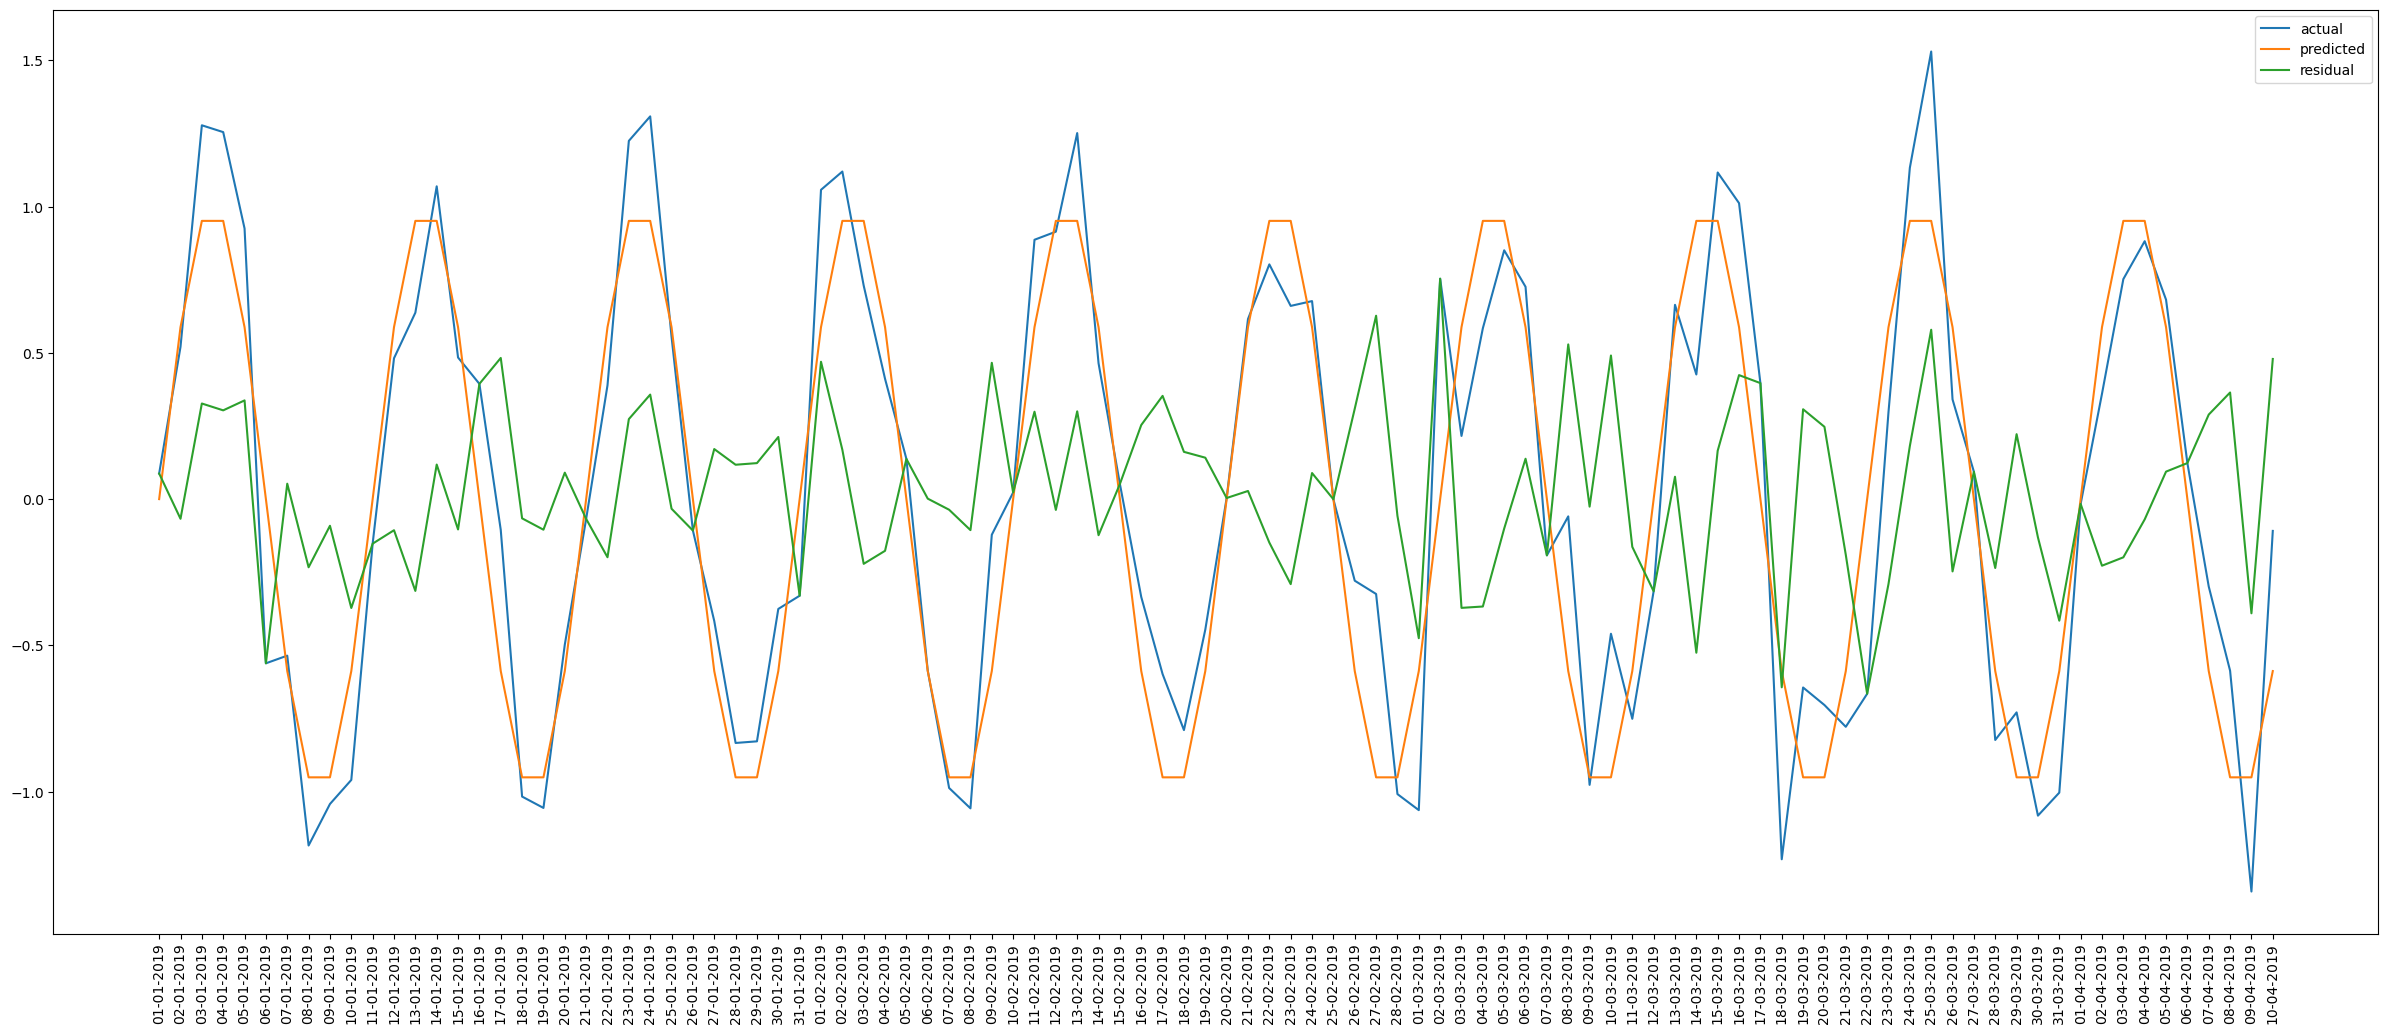

In [18]:
time_step = 1
period = 10
freq = 1/period
time_vec = np.array(range(len(data)))
predicted = (np.sin(2*np.pi*freq*time_vec)) # sine wave equation
plt.figure(figsize=(30,12))
plt.plot(data['date'], data['temp_sensor2'])
plt.plot(data['date'], predicted)
plt.plot(data['date'], residual)
plt.legend(['actual','predicted','residual'])
plt.xticks(rotation=90);

## Calculate the noise part (freq and amp) for the residual

* The residual(random part) will not show any particular pattern

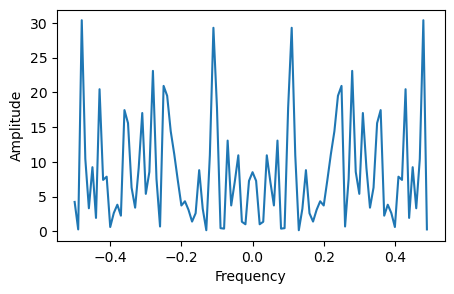

In [19]:
plot_fft(residual.values) 

*It is not possible to model this kind of data until u know some theoritical pointers from where to start. While it was possible in case of temp_sensor1 and temp_sensor2 data cz it did looked like a signal with some periodicity so we used fft to extract the dominating frequency present in signal which act like a theoritical pointers to come up with sine wave equation to model that. In case of residuals when we do fft we have all freq components in same amount as seen above & hence no theoritical pointer to start i.e. it is just random fluctuations*

* The result shows amplitude across all frequencies which is called as **White Noise**
* It is completely a random signal which can't be predicted at all
* Noise is somthing for which we can't develop a model.

Hence Noise is something for which u cannot make any theoritical models. For the temp_sensor1 (it was ideal scenario with no noise part) and temp_sensor2 (real world ts) u were able to model the deterministic part but White noise is something which is random & cant be modelled & hence u got error which is residuals.

<font color=blue>There is no theoritical modelling basis to model noise but we just make an assumption to model noise-

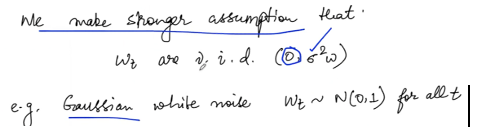

**Note** - *Residuals, when predicted from any data should not have any deterministic part in it and should be completely a white noise signal. Only then we can say that our model captured the determinitic part of the signal and whatever is left is just a white noise*  

# Random signal or white noise

#### Creating a white noise

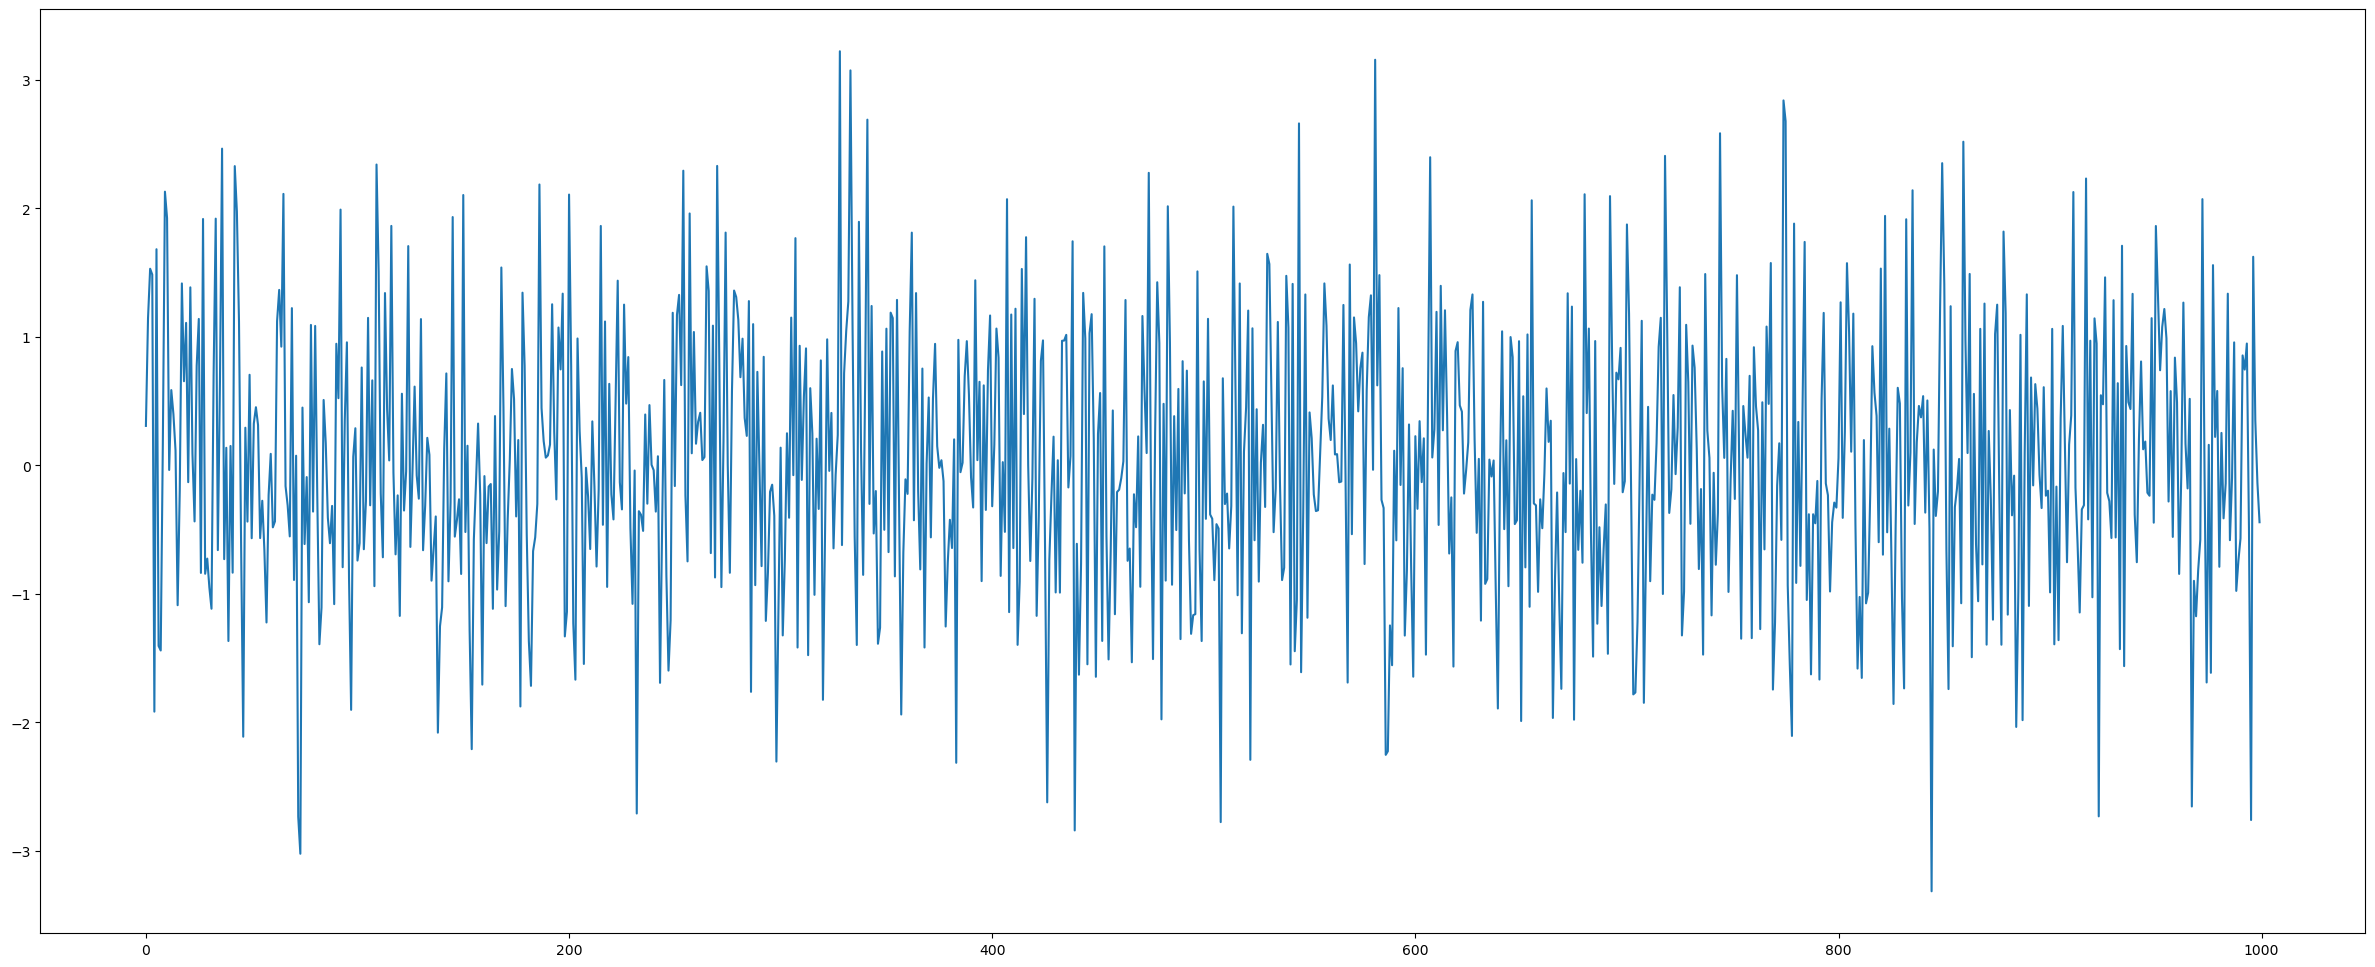

In [20]:
mean = 0
std = 1
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples) # generating a random signal using mean, std & size
plt.figure(figsize=(30,12))
plt.plot(samples)
plt.show()

# Plot frequency and amp from samples using fn defined above

#### We see there are many frequencies when we do fft for white noise & no particular dominating frequency present as was the case for deterministic signal where we could create a theoritical model

<Figure size 3000x1200 with 0 Axes>

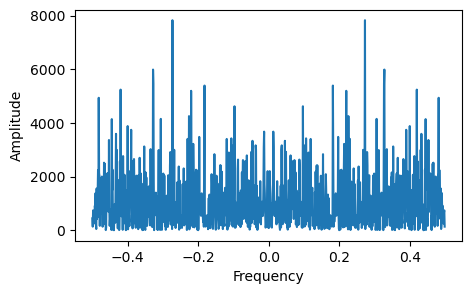

In [21]:
plt.figure(figsize=(30,12))
plot_fft(samples);

* We can see amp is very high across all freqs which is white noise

**Key Points/takeaways-**

- There is usually a theoritical model that is governing your data flow & that model we usually say, that is ur determininstic signal.

- In reality we rarely have a completely deterministic signal i.e data will mostly have noise over deterministic signal

- For error/ residual part (actual-prediction) if we do FFT we find many freq components in the same amount, with no particular frequency dominating the others & no one data point is related to another, just like random fluctuating signal confirming it is noise. Hence we can confirm we were able to model deterministic part & what is left is only noise.
